# <span style="color:#900C3F"> Laboratorio di Simulazione Numerica</span>

# <span style="color: #C70039 "> Esercitazione 4</span>

### <span style="color: #FF5733 "> Esercizio 04.1</span>

Ci è stato fornito un codice che esegue una simulazione di dinamica molecolare, partendo da una configurazione iniziale e salvando la configurazione finale. Il codice genera le velocità iniziali in modo che siano distribuite secondo una Maxwell-Boltzmann e in modo che la temperatura sia quella desiderata letta da file di input.  
Ho aggiunto al codice la possibilità di memorizzare oltre che la configurazione finale, anche quella immediatamente precedente. In particolare, ho aggiunto una variabile *restart* il cui valore (0 o 1) viene letto da file di input: quando questa vale 0, il codice parte leggendo solo la configurazione iniziale e termina ricordando anche la precedente. Per fare questo ho aggiunto alla funzione già presente *ConfFinal* la possibilità di stamparte sul file di output *config.pre* la penultima configrazione.  
Quando la variabile *restart* vale invece 1 il codice legge le configurazioni *r=r(t)* e *$r_{old}=r(t-dt)$* dai rispettivi files e genera le velocità nel seguente modo:  
- viene eseguito un passo del Verlet (*Move*), quindi *$r(t)=r_{old}$* e *$r(t+dt)=r$*  
- viene calcolata $v^2$ come: $(v(\frac{dt}{2}))^2=(\frac{r(t+dt)-r(t)}{dt})^2$
- viene calcolata la temperatura attuale $T=\frac{(v(\frac{dt}{2}))^2}{3}$
- viene calcolato il fattore di scala come $fs=\frac{T}{temp}$ (dove *temp* indica la temperatura a cui si desidera lavorare)
- le velocità vengono riscalate del fattore fs
- vengono settate delle nuove *$r_{old}=r(t+dt)-vdt$* 

Queste operazioni vengono svolte nella funzione *Input*.

### <span style="color: #FF5733 "> Esercizio 04.2</span>

Ho aggiunto al codice la possibilità di calcolare alcune proprietà medie del sistema con la loro incertezza statistica, utilizzando il metodo dei blocchi (il codice fornitoci era già in grado di calcolare i valori istantanei di queste quantità). Per farlo ho implementato la funzione *Accumula* che viene chiamata ogni qualvotla viene chiamata la funzione *Measure* e somma nei corretti accumulatori i valori istantanei delle grandezze misurate. Ho poi implementato la funzione *Blocco*, che accumula la media del blocco e il suo quadrato e usa queste quantità per stampare su file di output la media del blocco attuale e l'incertezza statistica corrispondente; prima di uscire dalla funzione blocco vengono riazzerati gli accumulatori dei valori istantanei delle diverse grandezze.

### <span style="color: #FF5733 "> Esercizio 04.3</span>

Ho aggiunto al codice il calcolo della pressione, tramite:  
$$ P = \rho k_B T + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$  
Nel caso delle quantità fisiche calcolate in precedenza, il loro valore istantaneo aveva già il chiaro significato fisico di temperatura, energia cinetica, energia potenziale ed energia totale. Invece nel caso della pressione, la quantità (in unità di Lennard-Jones) $p=\frac{T}{V}+\frac{1}{3V}\langle W\rangle$ non ha il significato di pressione istantanea, in quanto la pressione è definita come media di ensamble. La quantità rilevante è quindi in questo caso la media del blocco.

### <span style="color: #FF5733 "> Esercizio 04.4</span>

Ho aggiunto la variabile *elemento*, che viene letta da file di input: se questa vale 1 viene simulato l'Argon, mentre se vale 2 viene simulato il Kripton. Ho inoltre moltiplicato le quantità richieste per i corretti fattori per passare da unità di Lennard-Jones a unità del SI.  
Svolgendo questo esercizio ho apprezzato la grande utilità delle unità ridotte: il codice è adatto a simulare sistemi molto diversi tra loro, modificando in modo molto semplice due soli parametri ($\sigma$ ed $\epsilon/k_B$) ed è così molto versatile.  

Per eseguire il codice è necessario mettere prima la variabile *restart* a zero e scegliere un piccolo numero di passi (per generare questi grafici ho scelto di fare 1000 step divisi in 100 blocchi), per evitare che questa fase sia eccessivamente lunga. Si mette poi *restar* uguale a 1 e si esegue il codice fino a che la temperatura non è quella desiderata (questa è la fase di equilibrazione). Una volta equilibrato il sistema, ho eseguito la vera e propria simulazione, lasciando *restart* uguale a 1 e facendo 50000 passi divisi in 50 blocchi.  
L'equilibrazione del sistema è fondamentale perchè l'algoritmo di Verlet lavora a energia costante, mentre io desidero simulare una precisa fase e lavorare a temperatura costante. Partendo da una configurazione FCC (descritta nel file *config.0*) a bassissima energia potenziale, non appena inizia la simulazione si osserva che l'energia potenziale aumenta molto, mentre la cinetica e la temperatura (che sono fra loro proporzionali) diminuiscono; tramite il processo di equilibrazione si riporta in alto la temperatura fino al valore desiderato.  
I grafici riportati di seguito presentano sia la fase di equilibrazione che la vera e propria simulazione, una di seguito all'altra. 

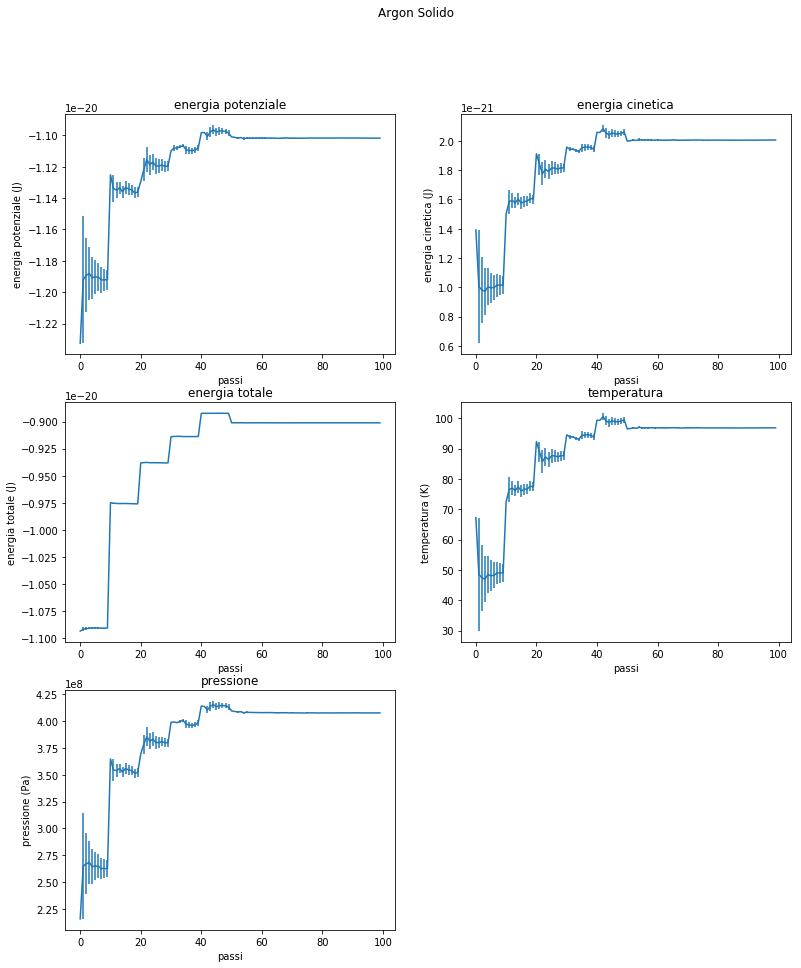

In [19]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13,15))

plt.suptitle("Argon Solido")

plt.subplot(3,2,1)
r, error = np.loadtxt("Argon_solido/ave_epot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale (J)')
plt.title('energia potenziale')

plt.subplot(3,2,2)
r, error = np.loadtxt("Argon_solido/ave_ekin.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica (J)')
plt.title('energia cinetica')

plt.subplot(3,2,3)
r, error = np.loadtxt("Argon_solido/ave_etot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale (J)')
plt.title('energia totale')

plt.subplot(3,2,4)
r, error = np.loadtxt("Argon_solido/ave_temp.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')

plt.subplot(3,2,5)
r, error = np.loadtxt("Argon_solido/ave_pressione.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('pressione')

plt.show()

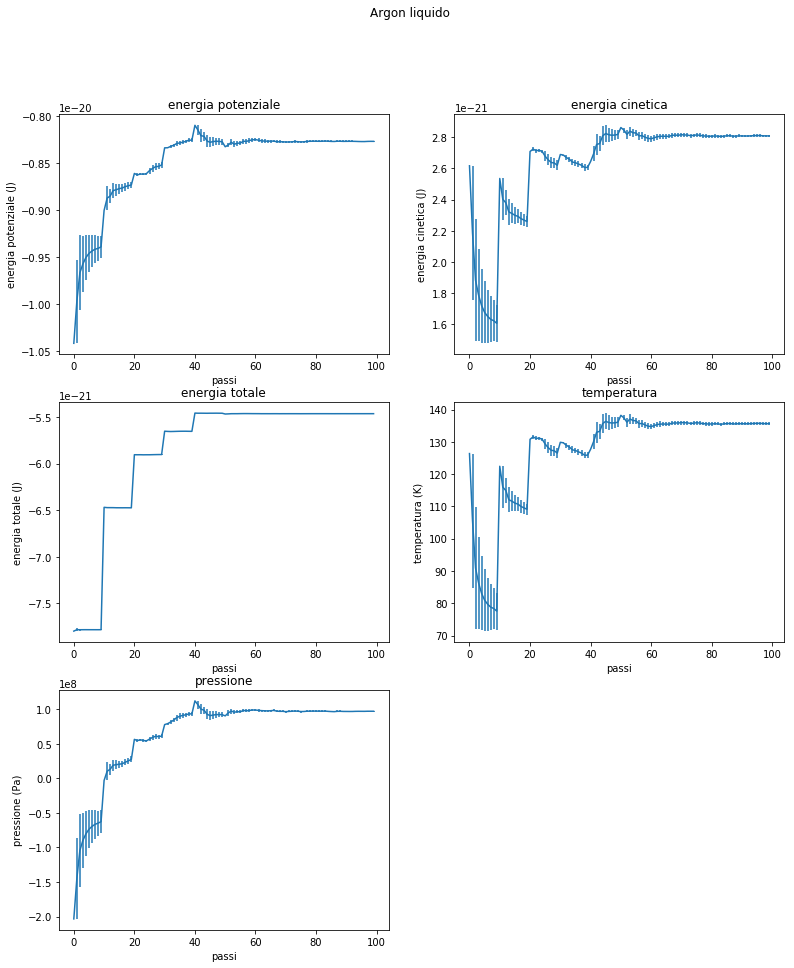

In [18]:
plt.figure(figsize=(13,15))

plt.suptitle ("Argon liquido")

plt.subplot(3,2,1)
r, error = np.loadtxt("Argon_liquido/ave_epot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale (J)')
plt.title('energia potenziale')

plt.subplot(3,2,2)
r, error = np.loadtxt("Argon_liquido/ave_ekin.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica (J)')
plt.title('energia cinetica')

plt.subplot(3,2,3)
r, error = np.loadtxt("Argon_liquido/ave_etot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale (J)')
plt.title('energia totale')

plt.subplot(3,2,4)
r, error = np.loadtxt("Argon_liquido/ave_temp.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')

plt.subplot(3,2,5)
r, error = np.loadtxt("Argon_liquido/ave_pressione.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('pressione')

plt.show()

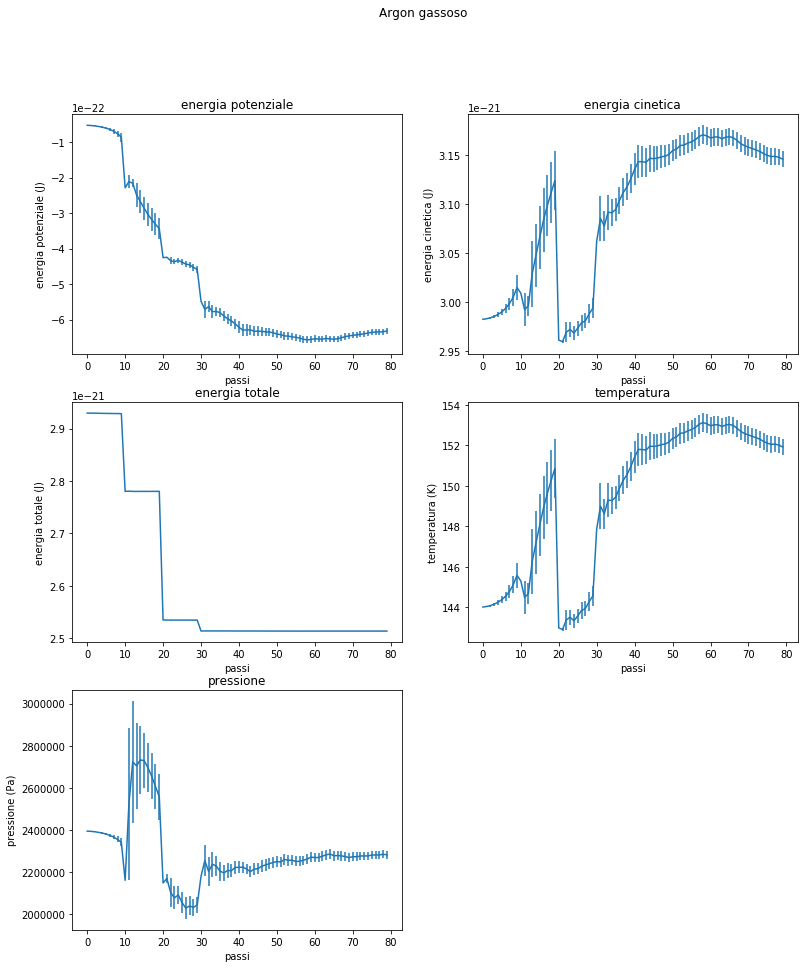

In [17]:
plt.figure(figsize=(13,15))

plt.suptitle("Argon gassoso")

plt.subplot(3,2,1)
r, error = np.loadtxt("Argon_gas/ave_epot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale (J)')
plt.title('energia potenziale')

plt.subplot(3,2,2)
r, error = np.loadtxt("Argon_gas/ave_ekin.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica (J)')
plt.title('energia cinetica')

plt.subplot(3,2,3)
r, error = np.loadtxt("Argon_gas/ave_etot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale (J)')
plt.title('energia totale')

plt.subplot(3,2,4)
r, error = np.loadtxt("Argon_gas/ave_temp.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')

plt.subplot(3,2,5)
r, error = np.loadtxt("Argon_gas/ave_pressione.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('pressione')

plt.show()

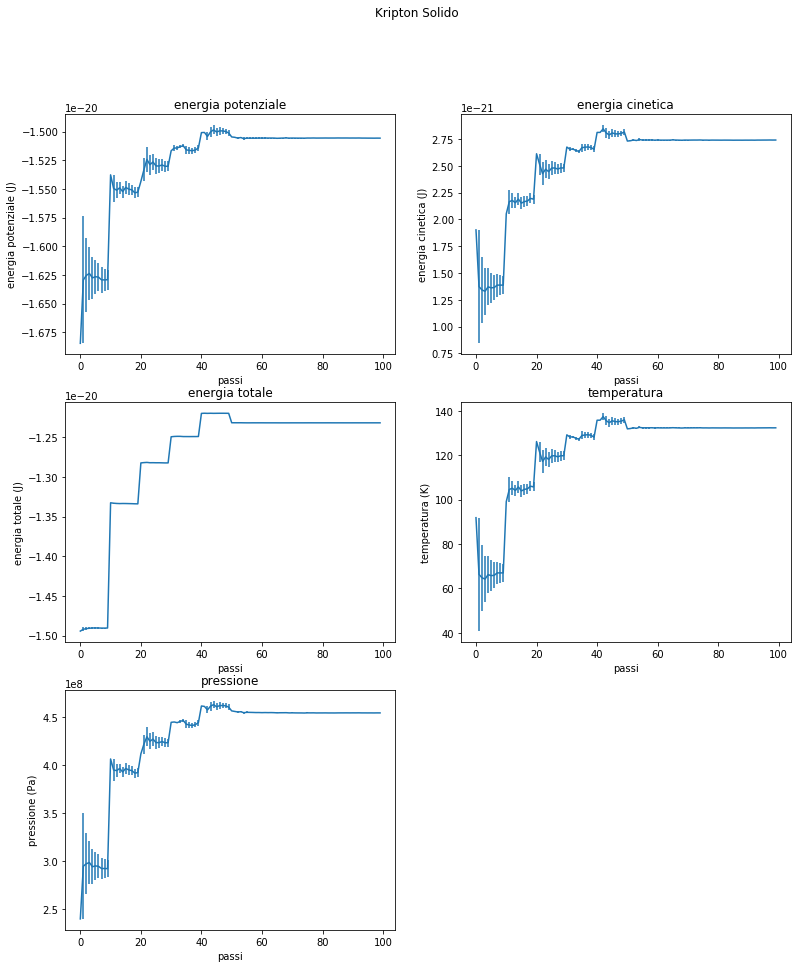

In [20]:
plt.figure(figsize=(13,15))

plt.suptitle("Kripton Solido")

plt.subplot(3,2,1)
r, error = np.loadtxt("Kripton_solido/ave_epot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale (J)')
plt.title('energia potenziale')

plt.subplot(3,2,2)
r, error = np.loadtxt("Kripton_solido/ave_ekin.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica (J)')
plt.title('energia cinetica')

plt.subplot(3,2,3)
r, error = np.loadtxt("Kripton_solido/ave_etot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale (J)')
plt.title('energia totale')

plt.subplot(3,2,4)
r, error = np.loadtxt("Kripton_solido/ave_temp.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')

plt.subplot(3,2,5)
r, error = np.loadtxt("Kripton_solido/ave_pressione.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('pressione')

plt.show()

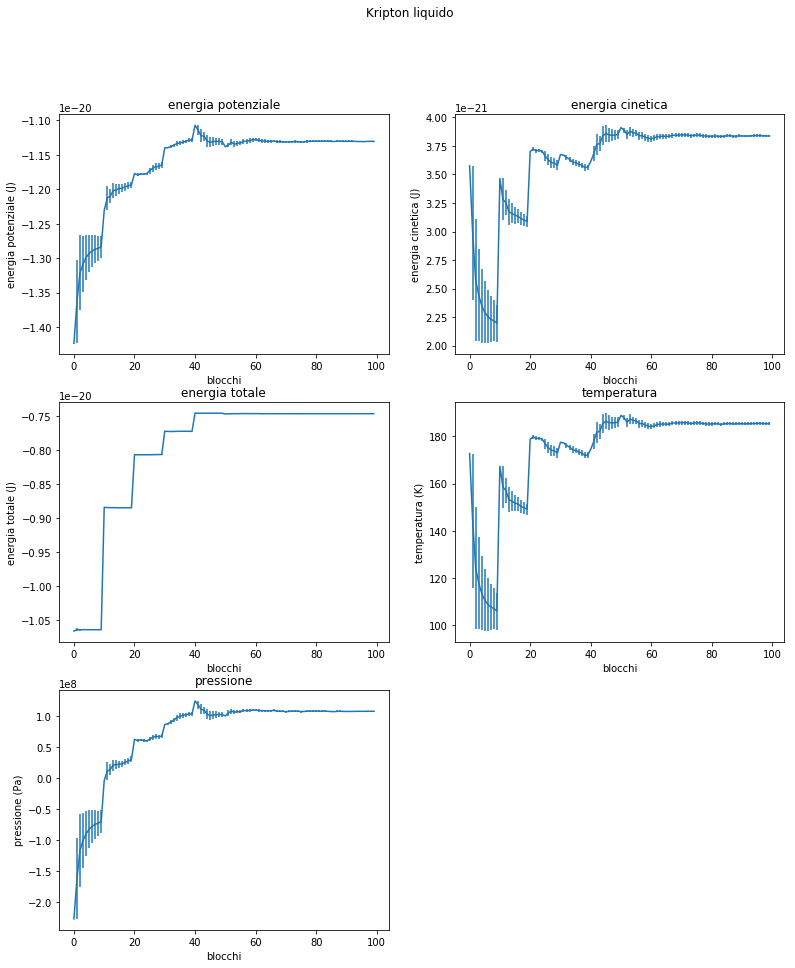

In [21]:
plt.figure(figsize=(13,15))

plt.suptitle ("Kripton liquido")

plt.subplot(3,2,1)
r, error = np.loadtxt("Kripton_liquido/ave_epot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale (J)')
plt.title('energia potenziale')

plt.subplot(3,2,2)
r, error = np.loadtxt("Kripton_liquido/ave_ekin.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica (J)')
plt.title('energia cinetica')

plt.subplot(3,2,3)
r, error = np.loadtxt("Kripton_liquido/ave_etot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale (J)')
plt.title('energia totale')

plt.subplot(3,2,4)
r, error = np.loadtxt("Kripton_liquido/ave_temp.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')

plt.subplot(3,2,5)
r, error = np.loadtxt("Kripton_liquido/ave_pressione.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('pressione')

plt.show()

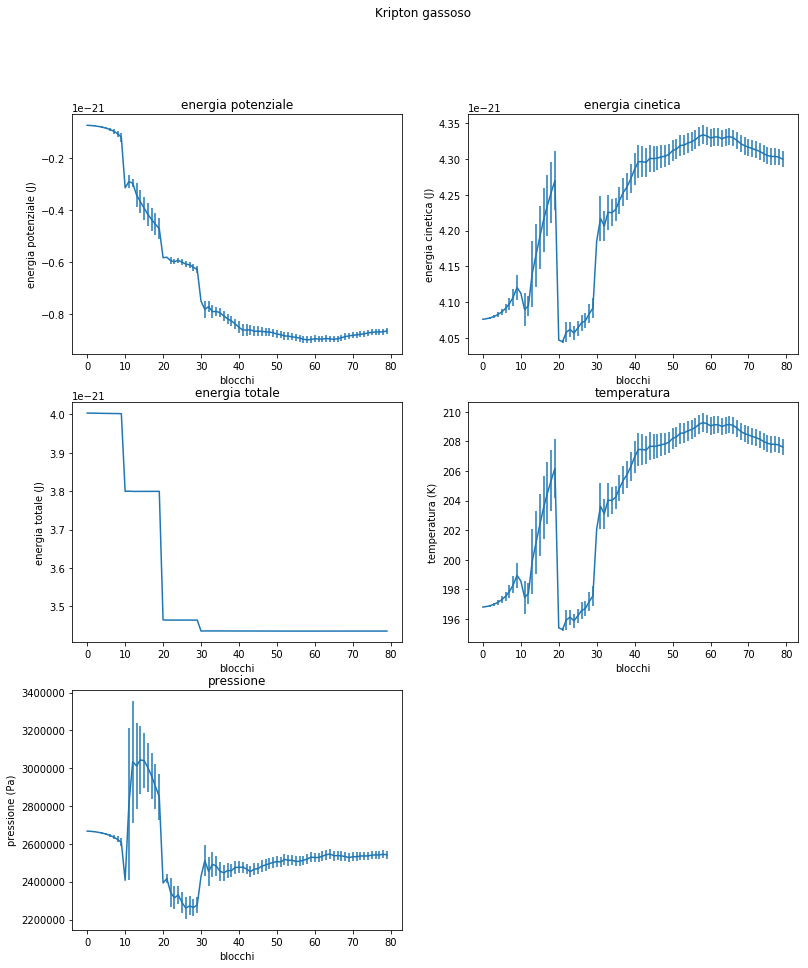

In [22]:
plt.figure(figsize=(13,15))

plt.suptitle("Kripton gassoso")

plt.subplot(3,2,1)
r, error = np.loadtxt("Kripton_gas/ave_epot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia potenziale (J)')
plt.title('energia potenziale')

plt.subplot(3,2,2)
r, error = np.loadtxt("Kripton_gas/ave_ekin.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia cinetica (J)')
plt.title('energia cinetica')

plt.subplot(3,2,3)
r, error = np.loadtxt("Kripton_gas/ave_etot.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('energia totale (J)')
plt.title('energia totale')

plt.subplot(3,2,4)
r, error = np.loadtxt("Kripton_gas/ave_temp.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('temperatura (K)')
plt.title('temperatura')

plt.subplot(3,2,5)
r, error = np.loadtxt("Kripton_gas/ave_pressione.out", usecols=(1,2), delimiter='\t', unpack=True)
n_b = np.arange(r.size)
plt.errorbar(n_b,r,yerr=error)
plt.xlabel('blocchi')
plt.ylabel('pressione (Pa)')
plt.title('pressione')

plt.show()

### <span style="color: #FF5733 "> Esercizio 07.3</span>

Ho implementato il calcolo della *radial distribution function* $g(r)$ (Si rimanda all'Esercitazione 7 per la descrizione del calcolo della $g(r)$).  

Si riportano di seguito i grafici della $g(r)$ per l'Argon e il Kripton nelle tre fasi. I dati utilizzati per costruire i grafici sono solo quello dell'ultimo blocco della simulazione.

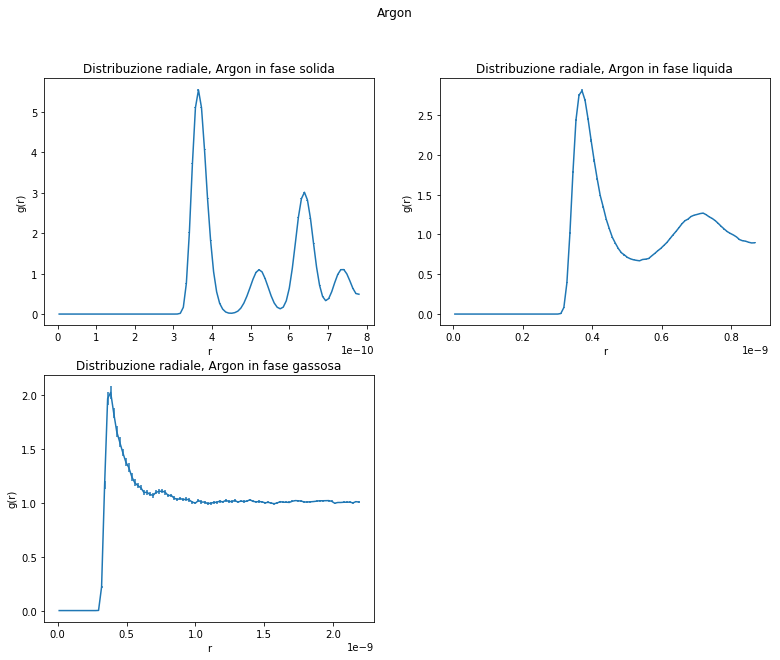

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(13,10))

plt.suptitle("Argon")

plt.subplot(2,2,1)
r, g, error = np.loadtxt("Argon_solido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale, Argon in fase solida')

plt.subplot(2,2,2)
r, g, error = np.loadtxt("Argon_liquido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale, Argon in fase liquida')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Argon_gas/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale, Argon in fase gassosa')

plt.show()

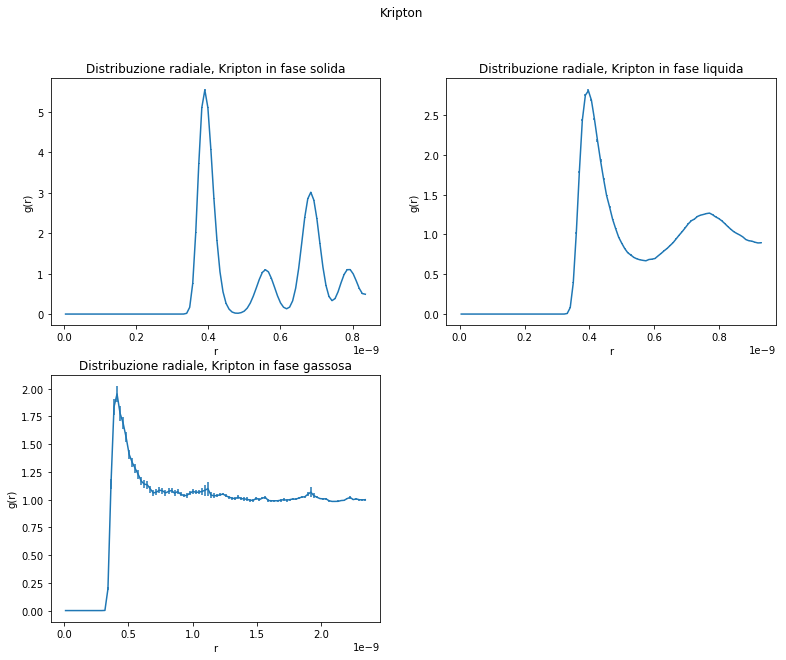

In [7]:
plt.figure(figsize=(13,10))

plt.suptitle("Kripton")
plt.subplot(2,2,1)
r, g, error = np.loadtxt("Kripton_solido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale, Kripton in fase solida')

plt.subplot(2,2,2)
r, g, error = np.loadtxt("Kripton_liquido/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale, Kripton in fase liquida')

plt.subplot(2,2,3)
r, g, error = np.loadtxt("Kripton_gas/ave_gdir.out", usecols=(0,1,2), delimiter='\t', unpack=True)
plt.errorbar(r,g,yerr=error)
plt.xlabel('r')
plt.ylabel('g(r)')
plt.title('Distribuzione radiale, Kripton in fase gassosa')

plt.show()